<h1>本章目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#藻类数量预测" data-toc-modified-id="藻类数量预测-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>藻类数量预测</a></span><ul class="toc-item"><li><span><a href="#问题背景" data-toc-modified-id="问题背景-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>问题背景</a></span></li><li><span><a href="#实验流程" data-toc-modified-id="实验流程-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>实验流程</a></span></li><li><span><a href="#探索性数据分析" data-toc-modified-id="探索性数据分析-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>探索性数据分析</a></span><ul class="toc-item"><li><span><a href="#数据获取" data-toc-modified-id="数据获取-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>数据获取</a></span></li><li><span><a href="#数据的分布形态" data-toc-modified-id="数据的分布形态-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>数据的分布形态</a></span></li><li><span><a href="#变量之间的相关性" data-toc-modified-id="变量之间的相关性-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>变量之间的相关性</a></span></li><li><span><a href="#脏数据处理" data-toc-modified-id="脏数据处理-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>脏数据处理</a></span></li><li><span><a href="#缺失值处理" data-toc-modified-id="缺失值处理-6.3.5"><span class="toc-item-num">6.3.5&nbsp;&nbsp;</span>缺失值处理</a></span></li><li><span><a href="#哑元变量" data-toc-modified-id="哑元变量-6.3.6"><span class="toc-item-num">6.3.6&nbsp;&nbsp;</span>哑元变量</a></span></li><li><span><a href="#测试集上相应的处理" data-toc-modified-id="测试集上相应的处理-6.3.7"><span class="toc-item-num">6.3.7&nbsp;&nbsp;</span>测试集上相应的处理</a></span></li></ul></li><li><span><a href="#算法建模" data-toc-modified-id="算法建模-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>算法建模</a></span><ul class="toc-item"><li><span><a href="#准备工作" data-toc-modified-id="准备工作-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#模型评估" data-toc-modified-id="模型评估-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>模型评估</a></span></li><li><span><a href="#多元线性回归" data-toc-modified-id="多元线性回归-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>多元线性回归</a></span></li><li><span><a href="#岭回归" data-toc-modified-id="岭回归-6.4.4"><span class="toc-item-num">6.4.4&nbsp;&nbsp;</span>岭回归</a></span></li><li><span><a href="#LASSO回归" data-toc-modified-id="LASSO回归-6.4.5"><span class="toc-item-num">6.4.5&nbsp;&nbsp;</span>LASSO回归</a></span></li><li><span><a href="#回归树" data-toc-modified-id="回归树-6.4.6"><span class="toc-item-num">6.4.6&nbsp;&nbsp;</span>回归树</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-6.4.7"><span class="toc-item-num">6.4.7&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-6.4.8"><span class="toc-item-num">6.4.8&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-6.4.9"><span class="toc-item-num">6.4.9&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-6.4.10"><span class="toc-item-num">6.4.10&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li></ul></li></ul></div>

# 藻类数量预测

## 问题背景

## 实验流程

## 探索性数据分析

### 数据获取

### 数据的分布形态

### 变量之间的相关性

### 脏数据处理

### 缺失值处理

### 哑元变量

### 测试集上相应的处理

## 算法建模

### 准备工作

加载相关的包

In [1]:
import os
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

绘图设置：

In [2]:
plt.style.use("seaborn-darkgrid")
favorable_figsize = (10, 6)
%matplotlib inline

设定随机状态种子，结果可复现：

In [3]:
rng = np.random.RandomState(2012)

解决中文显示问题:

In [4]:
plt.rcParams['font.sans-serif'] = ['FangSong']  # 制定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

本实验将大量采用sklern模块。由于sklearn新旧版本0.18.0前后版本差别较大，请确认一下目前所用的版本。

In [5]:
import sklearn
sklearn.__version__

'0.20.1'

In [6]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
Version(sklearn_version)

LooseVersion ('0.20.1')

忽略掉一些警告，保持界面整洁：

In [7]:
import warnings
warnings.filterwarnings("ignore")

读取保存的数据：

In [8]:
import pickle
with open('pickle/ch6_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
X_train = objects_awaken['X_train']
y_train = objects_awaken['y_train']
X_test = objects_awaken['X_test']
y_test = objects_awaken['y_test']

In [9]:
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### 模型评估

在数据分析领域，有一个最基本的理念：All models are wrong, but some are useful!。作为数据分析工程师，需要做的事情，就是从众多模型候选集中，选出最逼近真实情况（历史数据）的那一个！

对于回归问题而言，评估的指标很多，比如：

* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
* [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
* [explained_variance_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score)
* [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

本实验将可决系数作为评估指标：  
${R^2}\left( {y,\hat y} \right) = 1 - \frac{{\sum\nolimits_{i = 0}^{n - 1} {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\nolimits_{i = 0}^{n - 1} {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}$

In [10]:
from sklearn import metrics
def model_eval(y, yhat):
    plt.figure(figsize=favorable_figsize)
    plt.scatter(y, yhat, color='y', marker='o')
    plt.scatter(y, y,color='g', marker='+')
    print("MSE:", metrics.mean_squared_error(y, yhat))
    print("R2:", metrics.r2_score(y, yhat))    

### 多元线性回归

线性回归是最为经典模型之一，在几乎任何一本统计、数据挖掘的书籍中，都离不开它的身影 。如果自变量只有一个，称之为简单线性回归或一元线性回归（univariate linear regression）；若自变量不止一个，称之为多元线性回归。  
线性模型当然是最为简单的模型之一，但simplity不代表naïve或是low.  
《The LION Way: Machine Learning Plus Intelligent Optimization》：  
> The truth is never linear!  
> Or almost never!  
> But often the linearity assumption is good enough .

多元线性回归的原理可以从多个角度切入，常见的是最小二乘的方法，原理如下：  
![img](figtabs/ch7/ols.png)
自然界是以最省力的方式运行的，用最小二乘来拟合一条直线，其道理也差不多，也符合能量最小这一自然美学原理。说白了，也就是要所有的弹簧，加起来的长度最短。需要注意的是，这里弹簧的长度，并非数据点到直线的距离。因为我们关注的是实际的y取值与预测出来的y值之间的差异。差异越小，证明模型预测的效果越好。所以我们关注的当然是y轴方向上的差别了。预测值与实际值之差有正有负，因此一般用平方和来表达总体差异。直线有无穷多条，我们想要的那一条，是差值平方和最小的那一条。换一句相对正式的话讲，我们所作的回归分析，是最小平方回归。用更加高大上一点的说法，可以美其名曰最小二乘回归（Least Squares Regression）。这里所谓的二乘，其实就是平方。我们现在说平方，古代数学称之为二乘。所谓的最小二乘，便是“最小平方”，从英文Least Squares也可以印证这一点。聪明的小伙伴肯定也想到了，既然可以用平方和来作为最合适直线的选择标准，应该也可以用绝对值之和来选择呀。没错，假如是绝对值之和的话，我们称之为最小一乘回归。有最小二乘、最小一乘，是否有最小零乘。还真有，感兴趣的同学，可以查找相关资料自行品读。  
下面用数学语言简单表述一下最小二乘回归：  
设有观测值$\left( {{X_1},{y_1}} \right),\left( {{X_2},{y_2}} \right), \cdots ,\left( {{X_n},{y_n}} \right)$，回归模型为：  
${y_i} = \alpha  + {\beta _1}{x_1} +  \cdots  + {\beta _p}{x_p} + {\varepsilon _i}$  
有了拟合直线之后，实际值${y_i}$与预测值$\hat y$之差${e_i} = {y_i} - {\hat y_i}$称之为残差。  
最小二乘回归就是要使残差平方和最小：sum of squared residuals, sum of squared errors或residual sum of squares，简称SSE或RSS。  
$SSE = \sum\limits_{i = 1}^n {e_i^2}  = \sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}}$  
参数估计的过程，也就是模型学习的过程：  
$\left( {{{\hat \alpha }^{(ols)}},{{\hat \beta }^{(ols)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}}$

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print (regr.coef_)
print (regr.intercept_)

[-0.97402023  2.55639363 -1.15209666 -3.43731497 -1.4128513  -4.34174154
 -5.52156469 -1.86399138 -0.8326542   0.79861112 -1.0846609   0.9374046
 -2.56971089 -0.38861237  2.64333036 -0.60076774  1.12910621 -0.24879795]
16.863


MSE: 273.89248130335574
R2: 0.3449061483574395


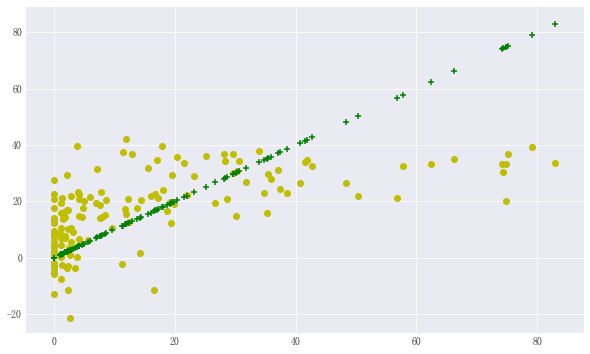

In [13]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

### 岭回归

基于普通最小二乘进行线性回归时，估计参数为：  
$\left( {{{\hat \alpha }^{(ols)}},{{\hat \beta }^{(ols)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}}$ 
而岭回归，则是要增加一个惩罚项，来约束系数的大小，即：  
$\left( {{{\hat \alpha }^{(ridge)}},{{\hat \beta }^{(ridge)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2} + \lambda \sum\limits_{j = 1}^p {\beta _j^2} }$  
这等价于在约束$\sum\limits_{j = 1}^p {\beta _j^2}  \le s$条件下，满足：  
$\left( {{{\hat \alpha }^{(ridge)}},{{\hat \beta }^{(ridge)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}} $   
这里边涉及到$\lambda$或者说$s$值的确定的问题，一般通过交叉验证等方法确定。

In [14]:
from sklearn.linear_model import Ridge,RidgeCV

In [15]:
regr = Ridge(alpha=0.5)
regr.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
print('系数矩阵:\n',regr.coef_)
print('线性回归模型:\n',regr)

系数矩阵:
 [-0.98061675  2.5462898  -1.1582065  -3.43064906 -1.41705398 -4.3313961
 -5.50224228 -1.85964487 -0.82675626  0.79318093 -1.0823167   0.93536879
 -2.55874207 -0.39223116  2.63749082 -0.59024563  1.11716562 -0.25034276]
线性回归模型:
 Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


MSE: 273.7594003252733
R2: 0.3452244503790852


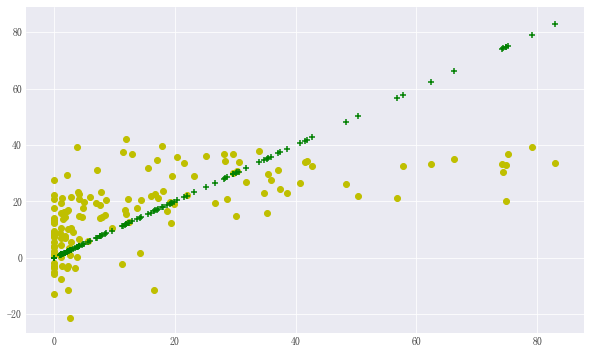

In [17]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

In [18]:
regr_cv = RidgeCV(cv=10).fit(X_train, y_train)

In [19]:
regr_cv.alpha_

10.0

MSE: 271.7170879562041
R2: 0.3501092368096733


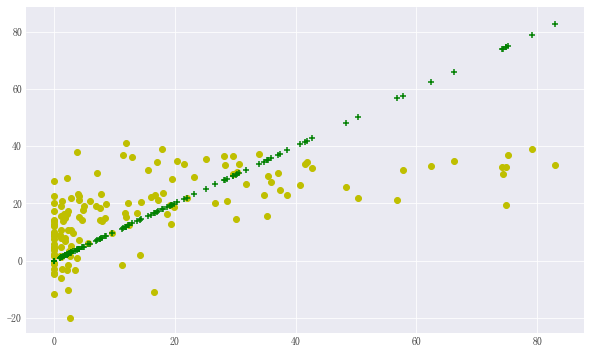

In [20]:
y_test_pred = regr_cv.predict(X_test)
model_eval(y_test, y_test_pred)

下边这种方法可行否？

In [21]:
n_alphas = 100
alphas = np.logspace(-2, 2, n_alphas)

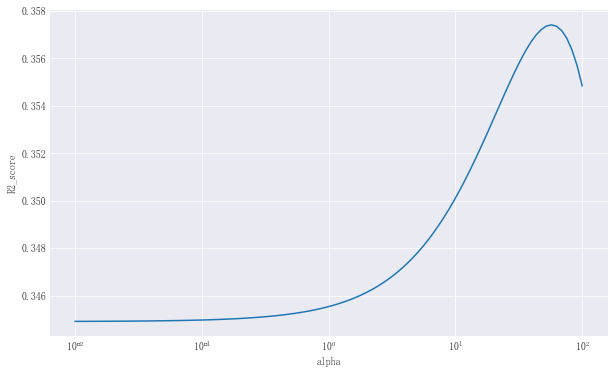

In [22]:
r2_scores = []
for a in alphas:
    regr = Ridge(alpha=a)
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    r2_scores.append(metrics.r2_score(y_test, y_test_pred))

plt.figure(figsize=favorable_figsize)
ax = plt.gca()

ax.plot(alphas, r2_scores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.show()

MSE: 268.66373029379497
R2: 0.35741223330666205


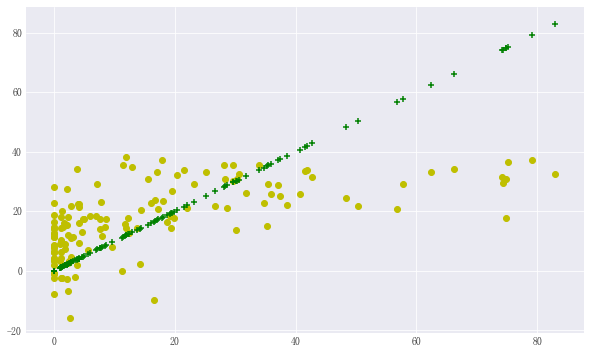

In [23]:
best_alpha = alphas[np.where(np.array(r2_scores) == np.array(r2_scores).max())]
bst_reg = Ridge(alpha=best_alpha)
bst_reg.fit(X_train, y_train)
y_test_pred = bst_reg.predict(X_test)
model_eval(y_test, y_test_pred)

### LASSO回归

LASSO回归原理上与岭回归有些类似，只不过其中的惩罚项不是系数的平方，二是其绝对值，即在约束$\sum\limits_{j = 1}^p {\left| {{\beta _j}} \right|}  \le s$条件下，满足：  
$\left( {{{\hat \alpha }^{(lasso)}},{{\hat \beta }^{(lasso)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2}}$   
这里边涉及到$\lambda$或者说$s$值的确定的问题，一般通过交叉验证等方法确定。

In [24]:
from sklearn.linear_model import Lasso
regr = Lasso(alpha=0.01)

In [25]:
regr.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

MSE: 273.601373935394
R2: 0.3456024166376497


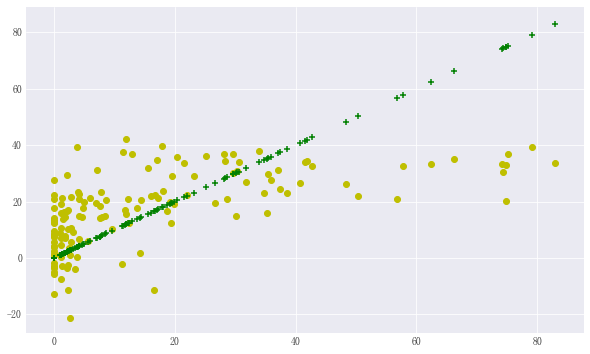

In [26]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

(-1.2515677385442059, 4.248432261455794, 4.179635554453078, 1300.4319585949968)

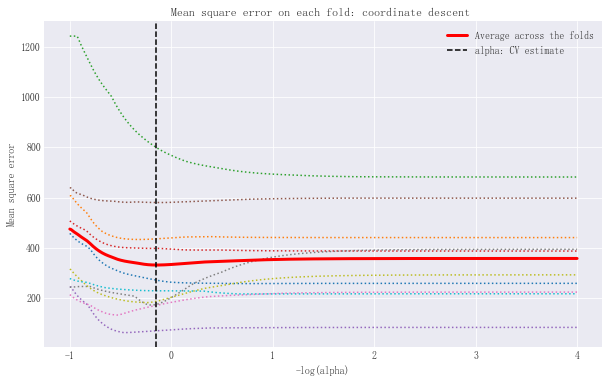

In [27]:
from sklearn.linear_model import LassoCV
regr_cv = LassoCV(cv=10, eps=1e-5, n_alphas=500).fit(X_train, y_train)

# Display results
m_log_alphas = -np.log10(regr_cv.alphas_)

plt.figure(figsize=favorable_figsize)
plt.plot(m_log_alphas, regr_cv.mse_path_, ':')
plt.plot(m_log_alphas, regr_cv.mse_path_.mean(axis=-1), 'red',
         label='Average across the folds', linewidth=3)
plt.axvline(-np.log10(regr_cv.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [28]:
regr_cv.alpha_

1.4120963541337583

MSE: 269.074316737368
R2: 0.3564301959266195


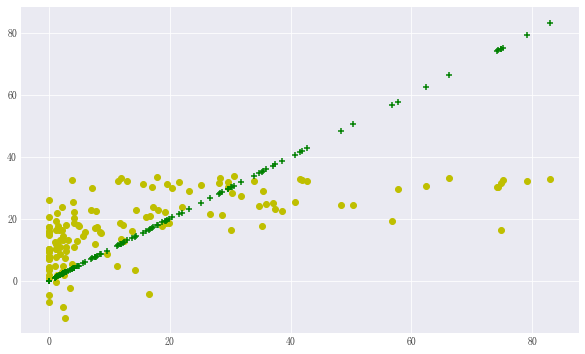

In [29]:
y_test_pred = regr_cv.predict(X_test)
model_eval(y_test, y_test_pred)

除了以上两种正则化方法之外，还有所谓的弹性网络（ElasticNet），介于 Ridge 回归和 Lasso 回归之间。它的正则项是 Ridge 回归和 Lasso 回归正则项的简单混合，同时你可以控制它们的混合率$r$，当$r{\rm{ = }}0$时，弹性网络就是 Ridge 回归，当$r{\rm{ = 1}}$时，其就是 Lasso 回归。  
$\left( {{{\hat \alpha }^{(ElasticNet)}},{{\hat \beta }^{(ElasticNet)}}} \right) = \mathop {\arg \min }\limits_{\left( {\alpha ,\beta } \right)} \sum\limits_{i = 1}^n {{{\left( {{y_i} - \alpha  - \sum\limits_{j = 1}^p {{x_{ij}}{\beta _j}} } \right)}^2} + r \times \lambda \sum\limits_{j = 1}^p {\left| {{\beta _j}} \right|}  + \frac{{1 - r}}{2}\lambda \sum\limits_{j = 1}^p {\beta _j^2} } $


MSE: 270.7143592942868
R2: 0.35250755522338795


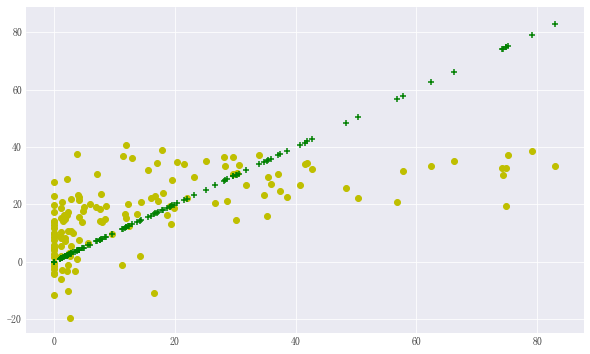

In [30]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.1, l1_ratio=0.5)
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

### 回归树

决策树用于回归时称为回归树（regression tree），用于分类时称为分类树（classification tree）——正如前一个实验《获胜球队预测中》所示，其原理也大同小异。下面看一下在sklearn中的具体实现。

In [31]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2)

In [32]:
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

MSE: 281.38805233969356
R2: 0.3269783013530655


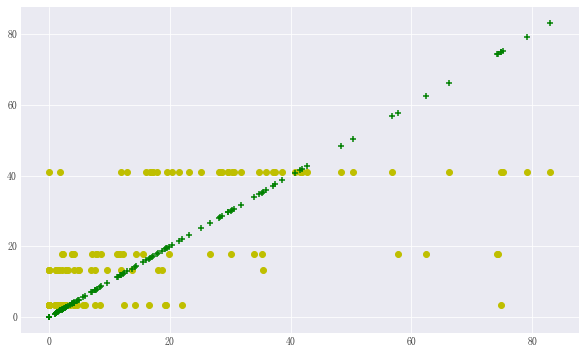

In [33]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)

对回归树进行可视化：

def print_graph(clf, feature_names=None):
    """Print decision tree."""
    graph = tree.export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=True, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        special_characters=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())
print_graph(regr)

当然，前面的参数设置比较随意，我们可以通过格子店搜索的方法，进行参数寻优：

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae", "friedman_mse"],
              "min_samples_split": [5, 10, 20],
              "max_depth": [1, 2, 3, 4, 5, 6, 7]}
regr = DecisionTreeRegressor()
regr_grid_cv = GridSearchCV(regr, param_grid, cv=5)
regr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae', 'friedman_mse'], 'min_samples_split': [5, 10, 20], 'max_depth': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
regr_grid_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

MSE: 281.38805233969356
R2: 0.3269783013530655


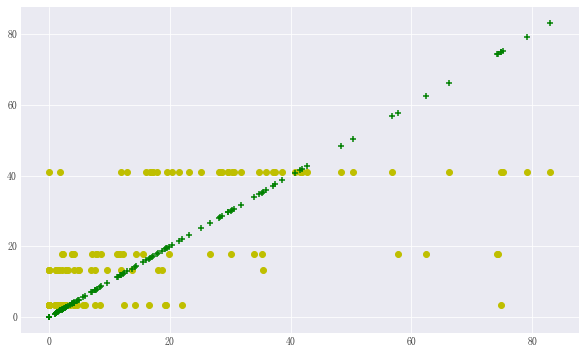

In [36]:
y_test_pred = regr_grid_cv.predict(X_test)
model_eval(y_test, y_test_pred)

### Bagging

bagging得名于Bootstrap AGGregatING，直译为中文应该是“自助聚集”。<br>
原理示意如下：<br>
<img src=figtabs/ch7/bagging.png align=center width=50% height=50% />

bagging算法原理如下：<br>
<img src=figtabs/ch7/bagging_alg.png align=left width=40% height=40%>

MSE: 201.68703349586892
R2: 0.5176065623618413


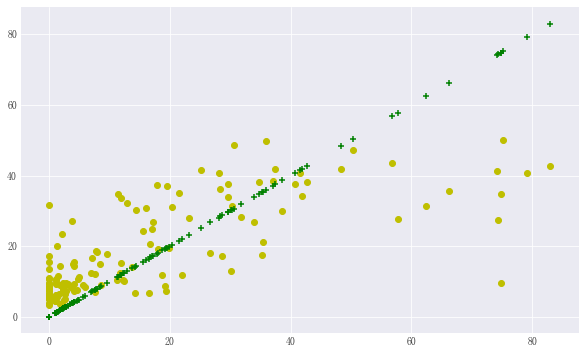

In [37]:
from sklearn.ensemble import BaggingRegressor

base_regr = DecisionTreeRegressor(max_depth=9)
bagging = BaggingRegressor(base_estimator=base_regr, n_estimators=1000, max_samples=1.0, max_features=0.35)
bagging.fit(X_train, y_train)
y_test_pred = bagging.predict(X_test)
model_eval(y_test, y_test_pred)
#0.532316943003849

In [38]:
#import pickle
#bagging1_state_of_art = {'bagging1':bagging1}
#with open('pickle/bagging1_state_of_art.pkl', 'wb') as f:
#    pickle.dump(bagging1_state_of_art, f)   

MSE: 195.53667405522694
R2: 0.532316943003849


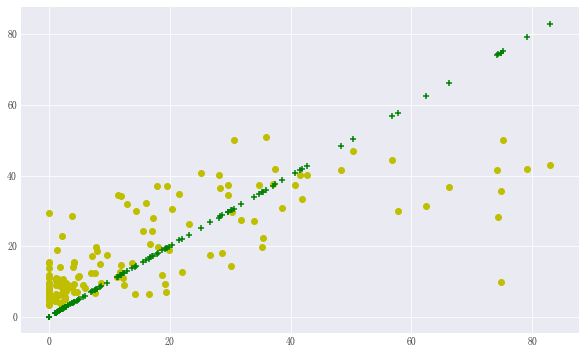

In [39]:
import pickle
with open('pickle/bagging1_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
bagging1_awaken = objects_awaken['bagging1']

y_test_pred = bagging1_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

### RandomForest

先尝试一下前述实验中已经用过的随机森林：

MSE: 200.79563412523666
R2: 0.5197386042648554


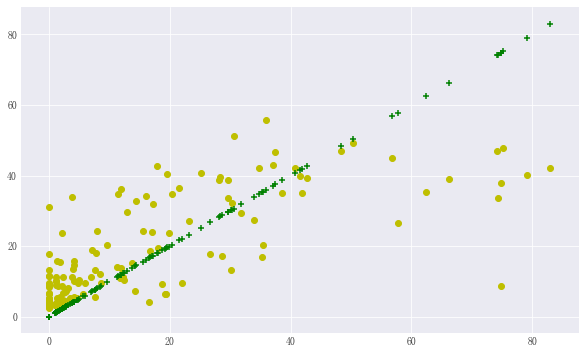

In [40]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=9,
                            max_features=0.25,
                            random_state=rng,
                            n_estimators=500)
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)
##0.5286474049642765

In [41]:
#import pickle
#rf_state_of_art = {'rf':reg}
#with open('pickle/rf_state_of_art.pkl', 'wb') as f:
#    pickle.dump(rf_state_of_art, f)  

MSE: 197.07089526089925
R2: 0.5286474049642765


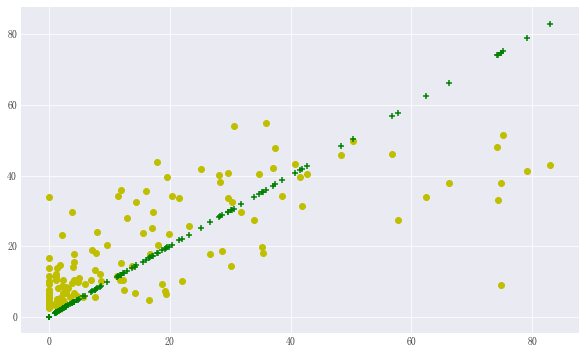

In [42]:
import pickle
with open('pickle/rf_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
rf_awaken = objects_awaken['rf']

y_test_pred = rf_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

### Boosting

AdaBoost方法是属于组合方法的一种学习算法。事实上对于这种类型的算法，它们的预测值是通过对一组基本模型的预测值进行某种形式的组合而形成的。AdaBoost方法应用一种自适应增强方法来得到一组基本模型。假如它比随机分类器好，那么增强方法是一种常见的提髙基本算法性能的方法。AdaBoost模型是通过序贯方式来获取的。序列的每一个新成员都是通过提高序列中前一个模型的误差率来获得的它通过一种加权模式来提离模型性能：它增加被前一个模型误分类的样本的权重，这意味着基本模型用于不同分布的训练集数据。经过以上过程的几次迭代，结果是一组在不同训练集数据上的基本模型。这个組合可以用于获得原始数据的甜试样本的预测值。对单个基本模型的预测值进行加权平均就可以得到组合预测值。权重的定义方式是，最大的权重赋给序列中最后得到的模型(理论上最小误差的模型）。

AdaBoost是adaptive boosting（自适应boosting）的缩写，其运行过程如下：<br>
训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量$D$。一开始，这些权重都初始化成相等值。首先在训练数据上训练出一个弱分类器并计算该分类器的错误率，然后在同一数据集上再次训练弱分类器。在分类器的第二次训练当中，将会重新调整每个样本的权重，其中第一次分对的样本的权重将会降低，而第一次分错的样本的权重将会提高。为了从所有弱分类器中得到最终的分类结果，AdaBoost为每个分类器都分配了一个权重值$\alpha$，这些$\alpha$值是基于每个弱分类器的错误率进行计算的。<br>
<img src=figtabs/ch7/adaboost.png align=center width=50% height=50% />

其中$\alpha$的计算方法如下：<br>
$\alpha  = \frac{1}{2}\ln \left( {\frac{{1 - err\_rate}}{{err\_rate}}} \right)$<br>
计算$\alpha$之后，可以对权重向量$D$进行更新，以使得那些正确分类的样本的权重降低而错分样本的权重升高。$D$的计算方法如下：<br>
如果某个样本被正确分类：$D_i^{\left( {t + 1} \right)} = \frac{{D_i^{\left( t \right)}{e^{ - \alpha }}}}{{Sum\left( D \right)}}$<br>
如果某个样本被错误分类：$D_i^{\left( {t + 1} \right)} = \frac{{D_i^{\left( t \right)}{e^\alpha }}}{{Sum\left( D \right)}}$<br>
在计算出$D$之后，AdaBoost又开始进入下一轮迭代。AdaBoost算法会不断地重复训练和调整权重的过程，直到训练错误率为0或者弱分类器的数目达到用户的指定值为止。

具体算法如下：<br>
<img src=figtabs/ch7/adaboost.m1_alg.png align=left height=60% width=60% />

In [43]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators = 2000, random_state=rng)
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=2000,
         random_state=<mtrand.RandomState object at 0x0000023B098BCEE8>)

MSE: 196.61811291775717
R2: 0.5297303661602655


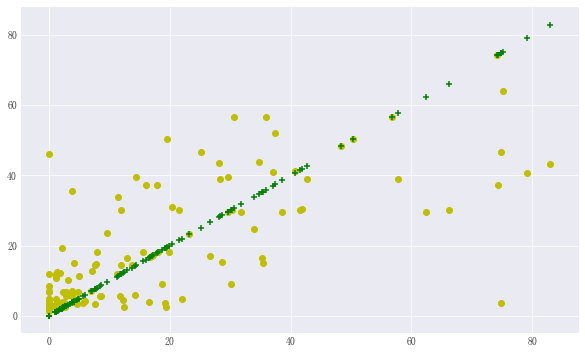

In [44]:
y_test_pred = regr.predict(X_test)
model_eval(y_test, y_test_pred)
#0.5442303540366082

In [45]:
#import pickle
#adaboost_state_of_art = {'adaboost':regr}
#with open('pickle/adaboost_state_of_art.pkl', 'wb') as f:
#    pickle.dump(adaboost_state_of_art, f)  

MSE: 190.55571796722876
R2: 0.5442303540366082


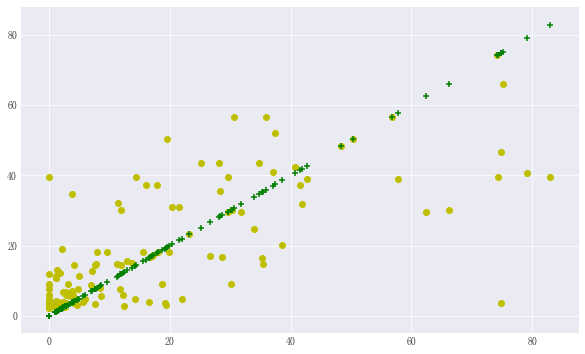

In [46]:
import pickle
with open('pickle/adaboost_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
adaboost_awaken = objects_awaken['adaboost']

y_test_pred = adaboost_awaken.predict(X_test)
model_eval(y_test, y_test_pred)

### Stacking

在集成方面，stacking与前述的简单多数投票、加权投票有所不同。在stacking中，所有的弱学习器被称作0级（0 level）学习器，他们的输出结果被一个1级（1 level）学习器接受，然后再输出最后的结果。<br>
其原理如下：<br>
<img src=figtabs/ch7/stacking.png align=center width=50% height=50%>

Stacking算法原理如下：<br>
<img src=figtabs/ch7/stacking_alg.png align=left width=40% height=40% />

In [47]:
z_scaler = StandardScaler()
y_train = z_scaler.fit_transform(np.reshape(y_train.values, (-1, 1)))
y_train = y_train[:, 0]

MSE: 195.10259885581814
R2: 0.533355160602704


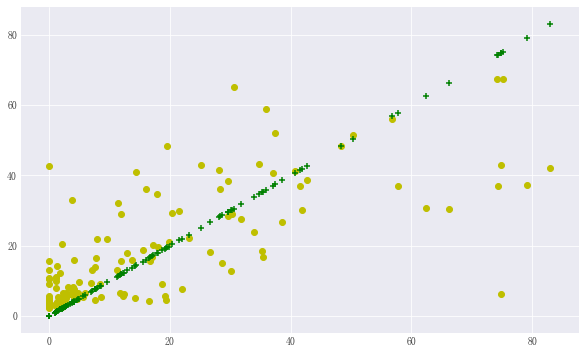

In [48]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

lm = LinearRegression()
rg = Ridge(alpha=10)
ls = Lasso(alpha=1.4)
dt = DecisionTreeRegressor(max_depth=2)
bg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                      n_estimators=1000,
                      max_samples=1.0,
                      max_features=0.35)
rf = RandomForestRegressor(max_depth=9,
                           max_features=0.25,
                           random_state=rng,
                           n_estimators=500)

ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                       n_estimators=2000, random_state=rng)

sv = SVR(kernel='rbf')

st = StackingRegressor(regressors=[lm, rg, ls, dt, bg, rf, ab],
                       meta_regressor=sv)
st.fit(X=X_train, y=y_train)
y_test_pred = st.predict(X_test)
model_eval(y_test, z_scaler.inverse_transform(y_test_pred))

In [49]:
#import pickle
#stacking_state_of_art = {'st':st}
#with open('pickle/stacking_state_of_art.pkl', 'wb') as f:
#    pickle.dump(stacking_state_of_art, f) 

MSE: 189.47002625642952
R2: 0.5468271028087519


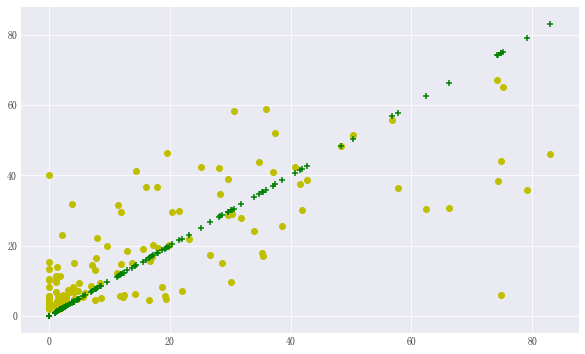

In [50]:
import pickle
with open('pickle/stacking_state_of_art.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
st_awaken = objects_awaken['st']

y_test_pred = st_awaken.predict(X_test)
model_eval(y_test, z_scaler.inverse_transform(y_test_pred))

In [51]:
for regr, label in zip([lm, rg, ls, dt, 
                       bg, rf, ab, sv, st],
                      ['linear model', 'ridge', 'lasso', 'Decision Tree',
                       'bagging', 'randomforest', 'boosting', 'svr', 'stacking']):
    regr.fit(X=X_train, y=y_train)
    y_test_pred = regr.predict(X_test)
    cur_r2 = metrics.r2_score(y_test, z_scaler.inverse_transform(y_test_pred))
    print("R^2 Score: %0.5f  [%s]" % (cur_r2, label))

R^2 Score: 0.34491  [linear model]
R^2 Score: 0.35011  [ridge]
R^2 Score: -0.00050  [lasso]
R^2 Score: 0.32698  [Decision Tree]
R^2 Score: 0.52064  [bagging]
R^2 Score: 0.51744  [randomforest]
R^2 Score: 0.54209  [boosting]
R^2 Score: 0.37564  [svr]
R^2 Score: 0.53085  [stacking]


至此，我们对常见的一些组合学习方法进行了介绍，对于藻类数量的预测这个实际问题，组合学习方法相对于弱学习器，优势比较明显。当然，可能同学们对于${R^2}$最高仅为0.5468可能并不满意——毕竟很多问题的可决系数高达0.9X。我们很难说可决系数达到一个什么样的标准我们才能满意，不过至少我们知道，对于藻类数量预测这份数据而言，在其他的一些研究里，在比较多种模型之后${R^2}$最大值是 0.534962，如此看来，咱们的实验结果还是这些方法的基础上有所进步。<br>
> Luís Torgo. Data Mining with R Learning with Case Studies. CRC Press, 2011. pp.93